<p style="align: center;"><img align=center src="https://s3.mooc.ru/prod/source/origin/photos/companies/2402/large.png"  width=900></p>
<h3 style="text-align: center;"><b>«A/B тесты и как их проводить»</b></h3>


In [1]:
# Подгрузим пакеты 
import numpy as np
import pandas as pd

import scipy.stats as stats 

import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns


In [2]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные

# Изменим формат  данных, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

df_melt.columns = ['index', 'treatments', 'value'] # заменяем имена столбцов
df_melt.head(8)

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29


**Построим коробчатую диаграмму, чтобы увидеть распределение данных по группам.** 

**Используя коробчатую диаграмму, мы можем легко обнаружить различия между разными методами лечения**

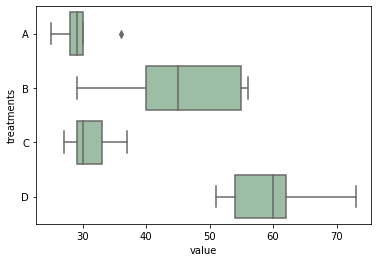

In [3]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
#sns.set(rc={'figure.figsize':(10, 5)})  # можно менять ширину и высоту при желании

ax = sns.boxplot(y='treatments', x='value', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [4]:
import scipy.stats as stats

# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'],  df['B'], df['C'], df['D'])

print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [5]:
fvalue, pvalue = stats.f_oneway(df['A'], df['C'])  # Сравнить
fvalue, pvalue

(0.40634920634920635, 0.5416380250488471)

# Дисперсионный анализ и датасет про раковины

<div class="alert alert-info">
Вот некоторые данные об измерении раковины (длина рубца передней приводящей мышцы, стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия и Tvarminne, Финляндия.
</div>

In [6]:
from scipy.stats import f_oneway # Импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672,0.0667, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]



F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # Дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

7.693917247212617 0.00014732337069417326
Разное распределение (отклоняем H0)


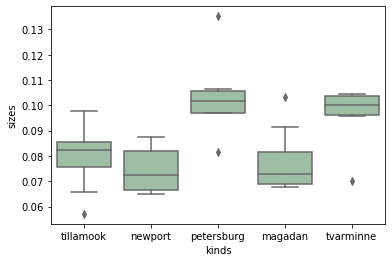

In [7]:
import seaborn as sns  # Еще одна библиотека для визуализации данных, но более продвинутая
 
# Немного преобразуем данные, не важно как
sizes = tillamook + newport + petersburg + magadan + tvarminne
kinds = ['tillamook']*len(tillamook) + ['newport']*len(newport)+['petersburg']*len(petersburg)+['magadan']*len(magadan) + ['tvarminne']*len(tvarminne)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

**Можете привести пример когда выборки зависимы, а когда нет ?**

# Критерий Манна-Уитни

<div class="alert alert-info">
Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни
</div>

In [8]:
from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерируем две независимых выборки

group_1 = [21,27,23,25,29,26,29,27,29,25,25,28,25,30,25,19,20,18,26,23,27,25,24,32,26,23,20,28,27,19,23,24,
           22,29,17,25,21,22,24,26,25,17,20,24,22,28,25,25,25,22,22,23,20,23,23,26,25,22]

group_2 = [20,26,22,24,28,28,26,25,28,18,19,17,25,25,22,24,23,31,25,22,19,27,26,18,22,23,16,
           21,28,24,20,21,23,25,24,16,19,23,21,27,21,21,30,22,19,22,22,25,24,21,25]

#np.random.seed(13)
#list(map(int, stats.norm.rvs(scale=4, loc=23, size=52))) 

In [11]:
# Сравнение групп
stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1777.000, p=0.069
Одинаковые распределения (не отвергаем H0)


24.155172413793103 23.0


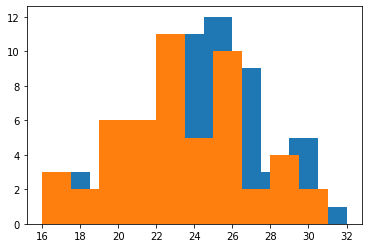

In [10]:
print(np.mean(group_1), np.mean(group_2))

plt.hist(group_1)
plt.hist(group_2);

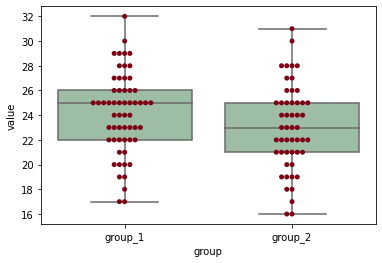

In [12]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1'] * len(group_1) + ['group_2'] * len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x='group', y='value', data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()

**Какие выборки зависимы? Приведите пример**

# Критерий Уилкоксона  

In [13]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test

group = [29, 23, 22, 16, 23, 23, 22, 24, 25, 20, 21, 22]# Некий общий элемент
group_1 = group + group 
group_2 = group + [32, 24, 24, 15, 25, 24, 23, 27, 27, 21, 22, 24] # отличие только в одном элементе, но другой порядок



In [14]:
import scipy.stats as stats

#Выполняем тест Уилкоксона

stat, p = wilcoxon(group_1, group_2)
#stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=3.500, p=0.005
Разные распределения (отвергаем H0)


/home/qeeq72/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


(array([2., 0., 1., 2., 8., 7., 0., 2., 1., 1.]),
 array([15. , 16.7, 18.4, 20.1, 21.8, 23.5, 25.2, 26.9, 28.6, 30.3, 32. ]),
 <BarContainer object of 10 artists>)

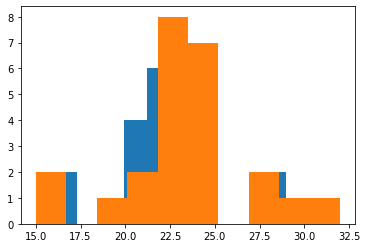

In [15]:
plt.hist(group_1)
plt.hist(group_2)

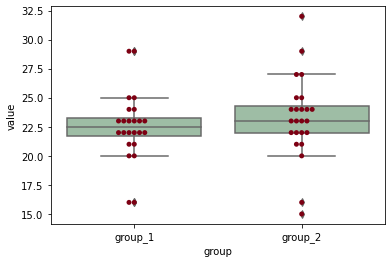

In [16]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1']*len(group_1)+['group_2']*len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота имеют цель - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [17]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

/home/qeeq72/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90.189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [18]:
# Сгруппируем результаты теста по версиям игры
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [19]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [ ]:
#Ваши выводы: пока анализа недостаточно для вывода

# Посмотрим на распределения в каждой группе

<div class="alert alert-info">
Гистограмма позволяет зрительно оценить распределение данных. Гистограмма дает информацию о разбросе, средних значениях.
Важно при критерии Стьюдента нормальное распределение, для других критериев распределение не имеет значения.
</div>

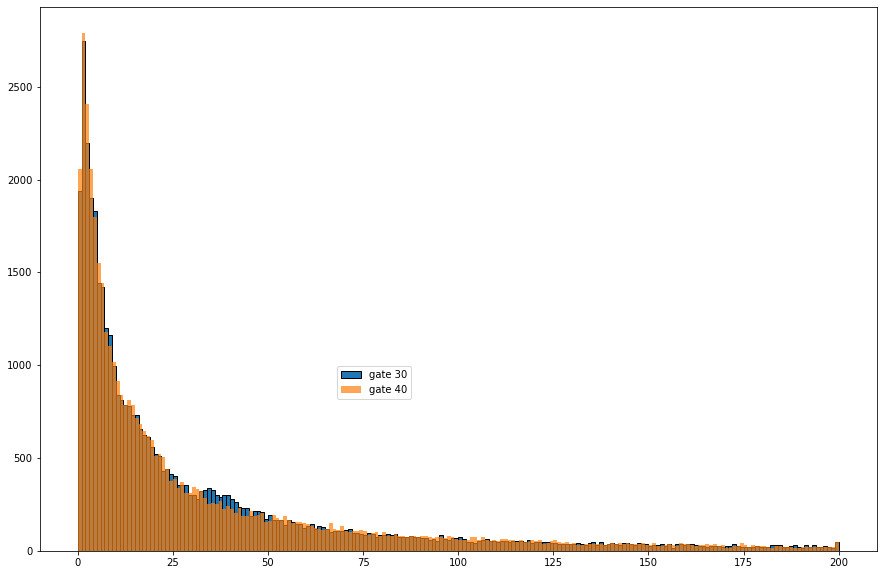

In [20]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']

v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)

bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**

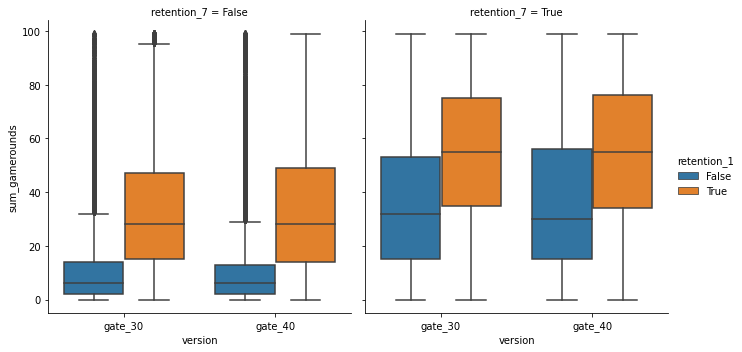

In [21]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


# Бутстрап или семплирование (Не бойся, это просто!)

<div class="alert alert-info">
Семплирование, простыми словами, это когда мы берем часть данных и считаем по ним метрику. И так повторяем много раз. Можем построить по метрикам гистограмму. Это экономит время, когда данных очень много.
</div>

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

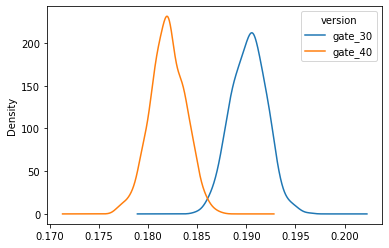

In [53]:
#Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [54]:
v_30 = boot_1d['gate_30']
v_40 = boot_1d['gate_40']

stats.ttest_ind(v_30, v_40)

Ttest_indResult(statistic=102.79970547604456, pvalue=0.0)

In [26]:
#v_30 = data.loc[data.version == 'gate_30']
#v_40 = data.loc[data.version == 'gate_40']

#stats.ttest_ind(v_30, v_40)

In [24]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код. 

In [ ]:
# f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
# f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [61]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

#Ваш код. 
gate_30_retention = data[data['version'] == 'gate_30']['retention_7']
gate_40_retention = data[data['version'] == 'gate_40']['retention_7']
stat, p = mannwhitneyu(gate_30_retention, gate_40_retention)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1025017239.000, p=0.002
Разные распределения (отвергаем H0)


**Ваши выводы?** 

In [81]:
print((gate_30_retention.loc[lambda x : x == True].count() / gate_30_retention.count()) * 100) 
print((gate_40_retention.loc[lambda x : x == True].count() / gate_40_retention.count()) * 100)

19.020134228187917
18.200004396667328


# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [102]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

stat, p_value  = stats.mannwhitneyu(A, B)
print('stat', stat)
print('p-value', p_value)

alpha = 0.05
if p_value < alpha:
    print(f"При уровне значимости {alpha} выборки отличаются!")
else:
    print(f"При уровне значимости {alpha} выборки НЕ отличаются!")

stat 4343.0
p-value 0.10869536089322271
При уровне значимости 0.05 выборки НЕ отличаются!


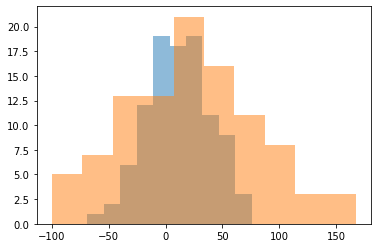

In [100]:
plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.show()

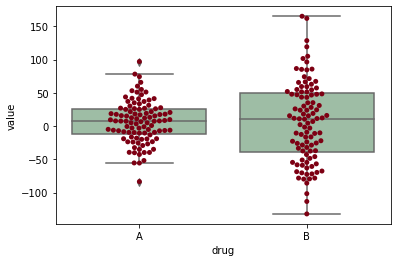

In [111]:
A_df = pd.DataFrame({'value': A, 'drug': 'A'})
B_df = pd.DataFrame({'value': B, 'drug': 'B'})
AB_df = pd.concat([A_df, B_df])
AB_df = AB_df.reset_index(drop=True)

ax = sns.boxplot(x='drug', y='value', data=AB_df, color='#99c2a2')
ax = sns.swarmplot(x='drug', y='value', data=AB_df, color='#7d0013')
plt.show()

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - **та же** группа людей, но получающая препарат
</div>

In [105]:
np.random.seed(12)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)


stat, p_value  = stats.wilcoxon(A, B)
print('stat', stat)
print('p-value', p_value)

alpha = 0.05
if p_value < alpha:
    print(f"При уровне значимости {alpha} выборки отличаются!")
else:
    print(f"При уровне значимости {alpha} выборки НЕ отличаются!")

stat 2447.0
p-value 0.7885535816793301
При уровне значимости 0.05 выборки НЕ отличаются!


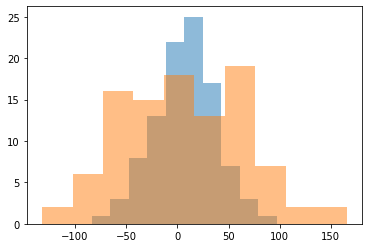

In [106]:
plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5)
plt.show()

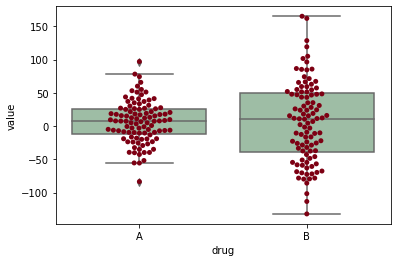

In [112]:
A_df = pd.DataFrame({'value': A, 'drug': 'A'})
B_df = pd.DataFrame({'value': B, 'drug': 'B'})
AB_df = pd.concat([A_df, B_df])
AB_df = AB_df.reset_index(drop=True)

ax = sns.boxplot(x='drug', y='value', data=AB_df, color='#99c2a2')
ax = sns.swarmplot(x='drug', y='value', data=AB_df, color='#7d0013')
plt.show()

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [115]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

F, p_value = f_oneway(water, nutri, mineral)

alpha = 0.05
print('F -', F)
print('p-value -', p_value)

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

F - 12.525963044834192
p-value - 2.9240047906326866e-05
Разное распределение (отклоняем H0)


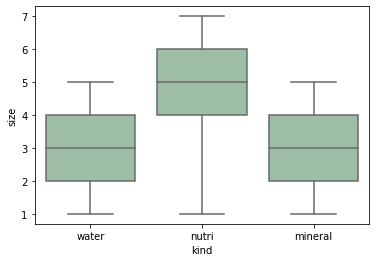

In [116]:
water_df = pd.DataFrame({'kind': 'water', 'size': water})
nutri_df = pd.DataFrame({'kind': 'nutri', 'size': nutri})
mineral_df = pd.DataFrame({'kind': 'mineral', 'size': mineral})
cucumbers_df = pd.concat([water_df, nutri_df, mineral_df])
cucumbers_df = cucumbers_df.reset_index(drop=True)

ax = sns.boxplot(x='kind', y='size', data=cucumbers_df, color='#99c2a2')
plt.show()

Использование удобрений дает ощутимый эффект по сравнению с минералкой. Минарелка же не дает никакого эффекта.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое памяти одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [117]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
# Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
# что они имеют одинаковую значимость

/home/qeeq72/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их.
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [142]:
grass_df = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'].isna())]
rock_df = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'].isna())]

t, p_value  = stats.ttest_ind(grass_df['Attack'], rock_df['Attack'])
print('t', t)
print('p-value', p_value)

alpha = 0.05
if p_value < alpha:
    print(f"При уровне значимости {alpha} выборки отличаются!")
else:
    print(f"При уровне значимости {alpha} выборки НЕ отличаются!")

t -3.60232780765211
p-value 0.0008620463823202559
При уровне значимости 0.05 выборки отличаются!


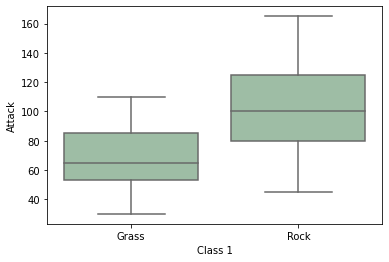

In [143]:
grass_rock_df = pd.concat([grass_df, rock_df])
grass_rock_df = grass_rock_df.reset_index(drop=True)

ax = sns.boxplot(x='Class 1', y='Attack', data=grass_rock_df, color='#99c2a2')
plt.show()

Профессор ошибся, покемоны класса rock имеют более сильную атаку.

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, правда ли, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их.
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [140]:
water_df = pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'].isna())]
normal_df = pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'].isna())]

t, p_value  = stats.ttest_ind(water_df['Speed'], normal_df['Speed'])
print('t', t)
print('p-value', p_value)

alpha = 0.05
if p_value < alpha:
    print(f"При уровне значимости {alpha} выборки отличаются!")
else:
    print(f"При уровне значимости {alpha} выборки НЕ отличаются!")

t -0.3529077969681485
p-value 0.7247871854890613
При уровне значимости 0.05 выборки НЕ отличаются!


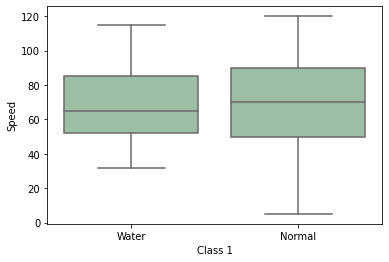

In [141]:
water_noraml_df = pd.concat([water_df, normal_df])
water_noraml_df = water_noraml_df.reset_index(drop=True)

ax = sns.boxplot(x='Class 1', y='Speed', data=water_noraml_df, color='#99c2a2')
plt.show()

В среднем, покемоны классов water и normal имеют одинаковую скорость.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Профессор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [160]:
# Покемоны, которые принимали сыворотку увеличения скорости.
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Speed Forme', 'Mega Lopunny']

In [161]:
pokemon[pokemon['Name'].isin(treathed_pokemon)]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [156]:
pokemon[pokemon['Name'].str.contains('Beedrill') == True]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
18,19,Beedrill,Bug,Poison,65,90,40,45,80,75,False
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False


In [157]:
pokemon[pokemon['Name'].str.contains('Alakazam') == True]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
70,71,Alakazam,Psychic,NaN,55,50,45,135,95,120,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False


In [158]:
pokemon[pokemon['Name'].str.contains('Deoxys') == True]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
429,430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True
430,431,Deoxys Defense Forme,Psychic,NaN,50,70,160,70,160,90,True
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True


In [159]:
pokemon[pokemon['Name'].str.contains('Lopunny') == True]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
475,476,Lopunny,Normal,NaN,65,76,84,54,96,105,False
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [189]:
untreathed_pokemon = ['Beedrill','Alakazam', 'Deoxys Normal Forme', 'Lopunny']
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Speed Forme', 'Mega Lopunny']

untreathed_df = pokemon[pokemon['Name'].isin(untreathed_pokemon)]
treathed_df = pokemon[pokemon['Name'].isin(treathed_pokemon)]

stat, p_value = stats.wilcoxon(untreathed_df['Speed'], treathed_df['Speed'])
print('stat', stat)
print('p-value', p_value)

alpha = 0.05
if p_value < alpha:
    print(f"При уровне значимости {alpha} выборки отличаются!")
else:
    print(f"При уровне значимости {alpha} выборки НЕ отличаются!")

stat 0.0
p-value 0.125
При уровне значимости 0.05 выборки НЕ отличаются!


In [185]:
print(untreathed_df[['Name', 'Speed']].head())
print('-----')
print(treathed_df[['Name', 'Speed']].head())

                    Name  Speed
18              Beedrill     75
70              Alakazam    120
428  Deoxys Normal Forme    150
475              Lopunny    105
-----
                   Name  Speed
19        Mega Beedrill    145
71        Mega Alakazam    150
431  Deoxys Speed Forme    180
476        Mega Lopunny    135


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных `Legendary` покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [194]:
pokemon['Skill sum'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon['Skill product'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']
ordinary_df = pokemon[pokemon['Legendary'] == False]
legendary_df = pokemon[pokemon['Legendary'] == True]

In [195]:
t, p_value  = stats.mannwhitneyu(ordinary_df['Skill sum'], legendary_df['Skill sum'])
print('t', t)
print('p-value', p_value)

alpha = 0.05
if p_value < alpha:
    print(f"При уровне значимости {alpha} выборки отличаются!")
else:
    print(f"При уровне значимости {alpha} выборки НЕ отличаются!")

t 5576.0
p-value 1.1270443168585851e-24
При уровне значимости 0.05 выборки отличаются!


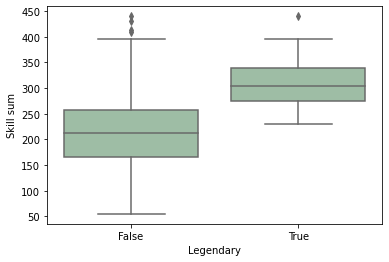

In [197]:
ax = sns.boxplot(x='Legendary', y='Skill sum', data=pokemon, color='#99c2a2')
plt.show()

In [196]:
t, p_value  = stats.mannwhitneyu(ordinary_df['Skill product'], legendary_df['Skill product'])
print('t', t)
print('p-value', p_value)

alpha = 0.05
if p_value < alpha:
    print(f"При уровне значимости {alpha} выборки отличаются!")
else:
    print(f"При уровне значимости {alpha} выборки НЕ отличаются!")

t 5741.5
p-value 2.955052576756104e-24
При уровне значимости 0.05 выборки отличаются!


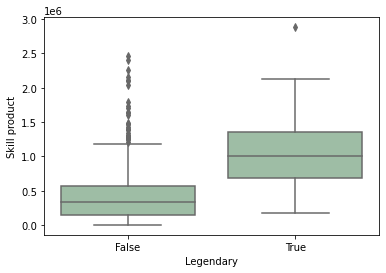

In [198]:
ax = sns.boxplot(x='Legendary', y='Skill product', data=pokemon, color='#99c2a2')
plt.show()

Легендарные покемоны сильно превосходят обычных согласно статистическим тестам.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые, на его взгляд, одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [247]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
rock_df = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'].isna())]
ground_df = pokemon[(pokemon['Class 1'] == 'Ground') & (pokemon['Class 2'].isna())]
steel_df = pokemon[(pokemon['Class 1'] == 'Steel') & (pokemon['Class 2'].isna())]
ice_df = pokemon[(pokemon['Class 1'] == 'Ice') & (pokemon['Class 2'].isna())]
rock_df.shape[0], ground_df.shape[0], steel_df.shape[0], ice_df.shape[0]

(9, 13, 5, 13)

In [248]:
rock_df['Defense'].sum(), ground_df['Defense'].sum(), steel_df['Defense'].sum(), ice_df['Defense'].sum()

(965, 1076, 660, 1039)

In [249]:
rock_df['Defense'].mean(), ground_df['Defense'].mean(), steel_df['Defense'].mean(), ice_df['Defense'].mean()

(107.22222222222223, 82.76923076923077, 132.0, 79.92307692307692)

In [250]:
F, p_value = f_oneway(rock_df['Defense'], ground_df['Defense'], steel_df['Defense'], ice_df['Defense'])


alpha = 0.05
print('F -', F)
print('p-value -', p_value)

if p_value > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

F - 2.334321928758713
p-value - 0.09023409807389118
Одинаковое распределение (не отвергаем H0)


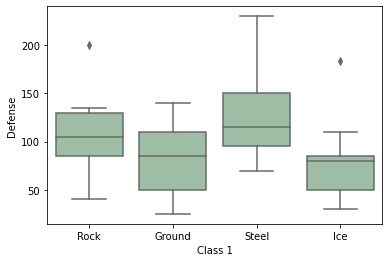

In [251]:
df = pd.concat([rock_df, ground_df, steel_df, ice_df])
ax = sns.boxplot(x='Class 1', y='Defense', data=df, color='#99c2a2')
plt.show()

На основе теста ANOVA можно сделать вывод, что данные классы не отличаются по уровню защиты.